In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data.csv")
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
print(
    'Il y a',
    len(df),
    'lignes et',
    df.count(axis = 'columns').max(),
    'variables dans ce data frame.'
)

Il y a 801 lignes et 41 variables dans ce data frame.


In [4]:
print('Types par variables\n')
types = df.dtypes
print(types)

Types par variables

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack             

In [5]:
print('Dans le df frame il y a', ((df.isnull().sum().sum() / df.size) * 100).round(2), '% de valeurs nulles.')
print('''Selon moi ce n'est pas problematique parce qu'on sait que les pokemons possedent en general qu'un seul type et qu'il est donc normal que le type2 ne soit pas fourni. Le type2 etant la variables qui compte le plus de valeurs nulle dans ici dans ce df frame.''')

Dans le df frame il y a 1.59 % de valeurs nulles.
Selon moi ce n'est pas problematique parce qu'on sait que les pokemons possedent en general qu'un seul type et qu'il est donc normal que le type2 ne soit pas fourni. Le type2 etant la variables qui compte le plus de valeurs nulle dans ici dans ce df frame.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


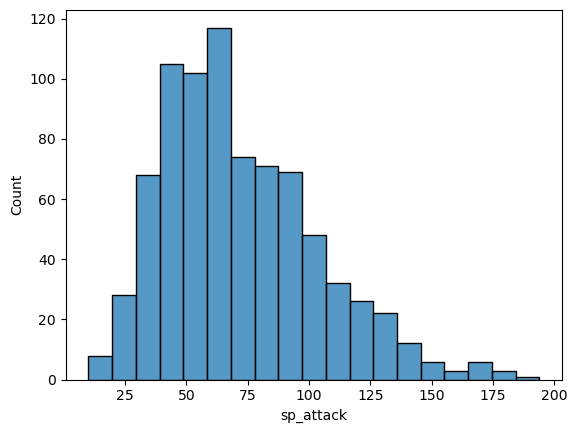

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


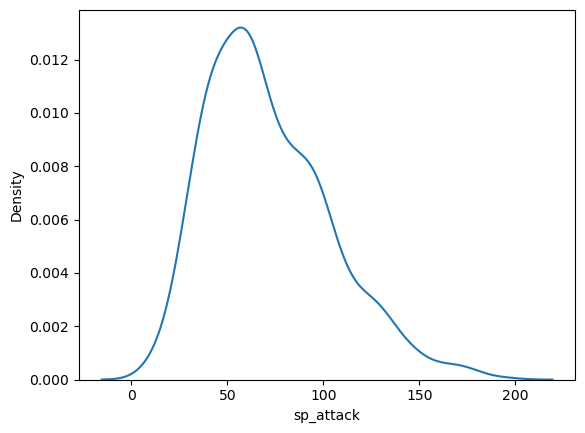

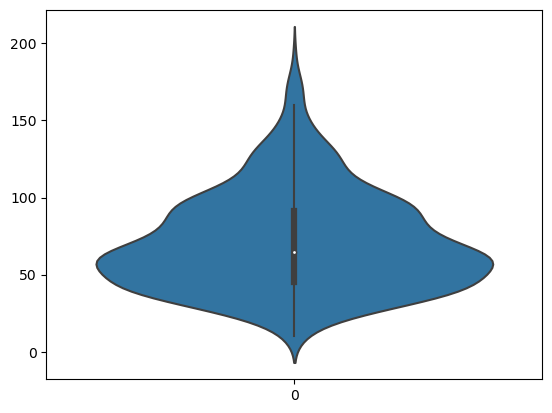

J'ai choisi par exemple la variable de vitesse d'attaque et j'ai affiche sa repartition avec le module plt. On peut voir que la plupart des pokemons possedent une vitesse d'attaque comprise entre 50 et 75. Les 2 premiers graphiques sont les memes mais utilisent soit des valeurs discretes soit une courbe continue.


In [6]:
sns.histplot(df['sp_attack'])
plt.show()
sns.kdeplot(df['sp_attack'])
plt.show()
sns.violinplot(df['sp_attack'])
plt.show()
print('''J'ai choisi par exemple la variable de vitesse d'attaque et j'ai affiche sa repartition avec le module plt. On peut voir que la plupart des pokemons possedent une vitesse d'attaque comprise entre 50 et 75. Les 2 premiers graphiques sont les memes mais utilisent soit des valeurs discretes soit une courbe continue.''')

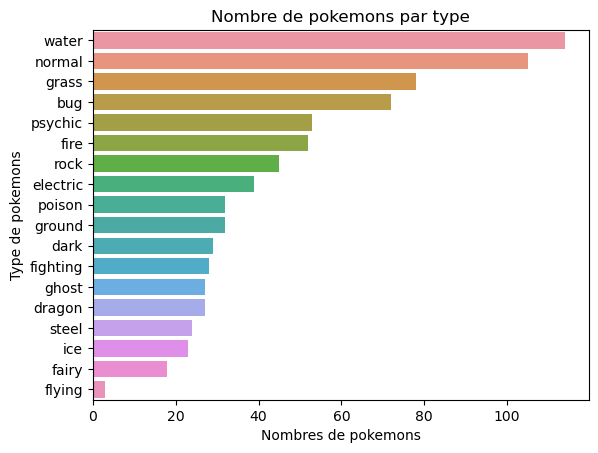

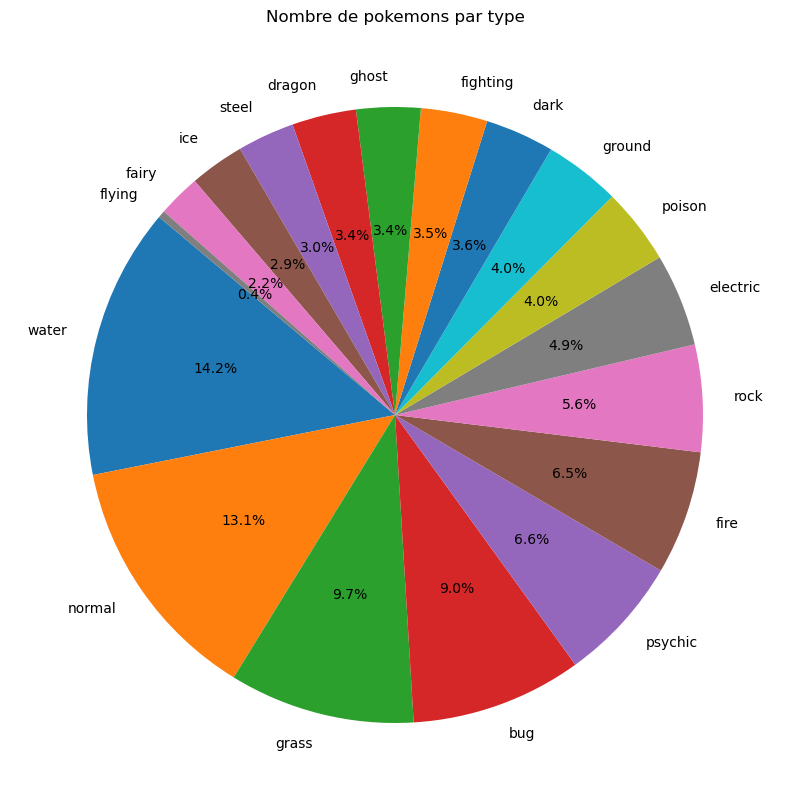

Ici j'affiche la repartition des pokemons par type d'element dans un barplot et un piechart, le piechart est le plus parlant je trouve mais dans les cas ou l'on se retrouve avec beaucoup de type, ca devient difficile a analyser alors que le barplot rest efficace en toutes circonstances pour la comparaison.


In [7]:
type_counts = df['type1'].value_counts().reset_index()
type_counts.columns = ['type1', 'count']

sns.barplot(x='count', y='type1', data=type_counts, orient='h')
plt.title('Nombre de pokemons par type')
plt.xlabel('Nombres de pokemons')
plt.ylabel('Type de pokemons')
plt.show()

plt.figure(figsize=(10, 10))
plt.pie(type_counts['count'], labels=type_counts['type1'], autopct='%1.1f%%', startangle=140)
plt.title('Nombre de pokemons par type')
plt.show()

print('''Ici j'affiche la repartition des pokemons par type d'element dans un barplot et un piechart, le piechart est le plus parlant je trouve mais dans les cas ou l'on se retrouve avec beaucoup de type, ca devient difficile a analyser alors que le barplot rest efficace en toutes circonstances pour la comparaison.''')

In [8]:
print(df[['attack', 'defense', 'speed', 'hp']].describe())
print('''\nIci la methode describe nous donne differentes statistiques sur les variables qu'on a selectionnees. "mean" est la moyenne pour chaque variables. "std" est l'ecart type qui represente la dispersion des donnees par rapport a la moyenne. 25% est le pourcentage de la population a presenter une valeur de variable inferieure ou egale a la valeur en question et pareil pour 50% et 75%.''')

           attack     defense       speed          hp
count  801.000000  801.000000  801.000000  801.000000
mean    77.857678   73.008739   66.334582   68.958801
std     32.158820   30.769159   28.907662   26.576015
min      5.000000    5.000000    5.000000    1.000000
25%     55.000000   50.000000   45.000000   50.000000
50%     75.000000   70.000000   65.000000   65.000000
75%    100.000000   90.000000   85.000000   80.000000
max    185.000000  230.000000  180.000000  255.000000

Ici la methode describe nous donne differentes statistiques sur les variables qu'on a selectionnees. "mean" est la moyenne pour chaque variables. "std" est l'ecart type qui represente la dispersion des donnees par rapport a la moyenne. 25% est le pourcentage de la population a presenter une valeur de variable inferieure ou egale a la valeur en question et pareil pour 50% et 75%.


In [9]:
print(pd.crosstab(df['type1'], df['is_legendary']))
print('''\nPar exemple ici je cherche a savoir s'il y a une correlation entre le type de pokemon et le fait qu'il soit legendaire. On peut voir que les pokemons de type dragon semblent avoir plus de chance d'etre legendaire tout comme les type psychic.''')

is_legendary    0   1
type1                
bug            69   3
dark           26   3
dragon         20   7
electric       34   5
fairy          17   1
fighting       28   0
fire           47   5
flying          2   1
ghost          26   1
grass          74   4
ground         30   2
ice            21   2
normal        102   3
poison         32   0
psychic        36  17
rock           41   4
steel          18   6
water         108   6

Par exemple ici je cherche a savoir s'il y a une correlation entre le type de pokemon et le fait qu'il soit legendaire. On peut voir que les pokemons de type dragon semblent avoir plus de chance d'etre legendaire tout comme les type psychic.


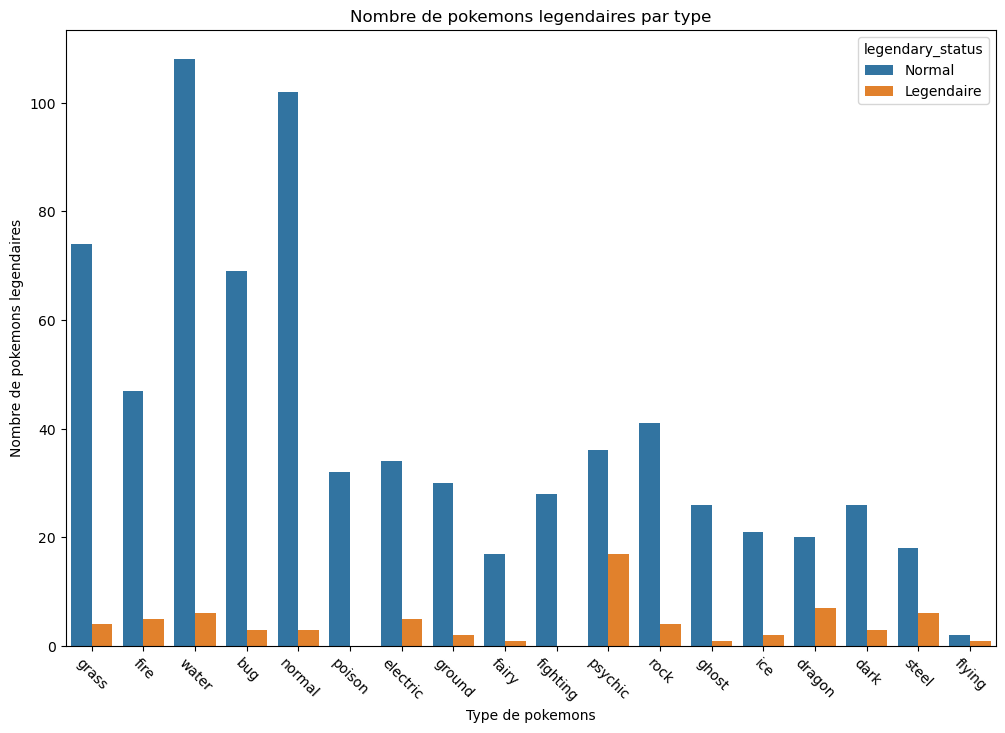


Ici sont les donnees sous forme graphique du nombre de pokemons legendaires par type.


In [10]:
df['legendary_status'] = df['is_legendary'].map({0: 'Normal', 1: 'Legendaire'})
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='type1', hue='legendary_status')
plt.title('Nombre de pokemons legendaires par type')
plt.xlabel('Type de pokemons')
plt.ylabel('Nombre de pokemons legendaires')
plt.xticks(rotation=-45)
plt.show()
print('''\nIci sont les donnees sous forme graphique du nombre de pokemons legendaires par type.''')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


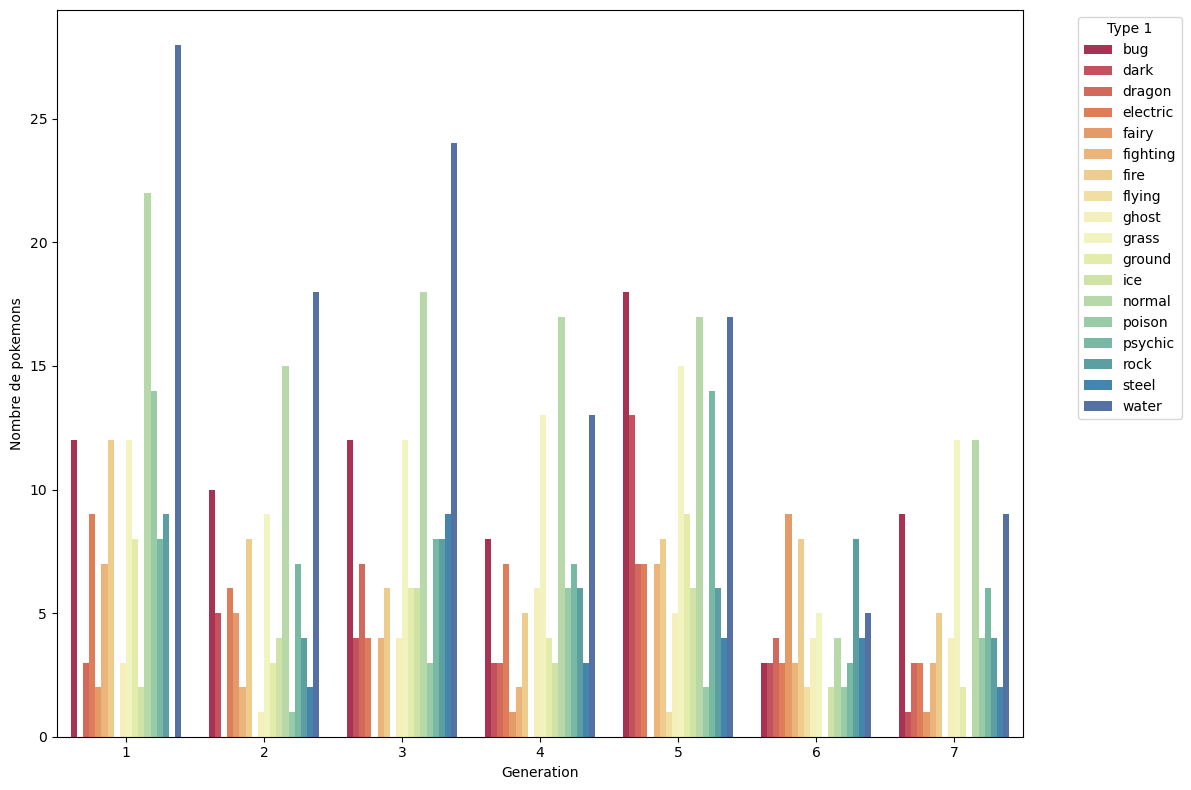

In [11]:
df['generation'] = df['generation'].astype('category')
df['type1'] = df['type1'].astype('category')
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='generation', hue='type1', palette='Spectral')
plt.xlabel('Generation')
plt.ylabel('Nombre de pokemons')
plt.legend(title='Type 1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated 

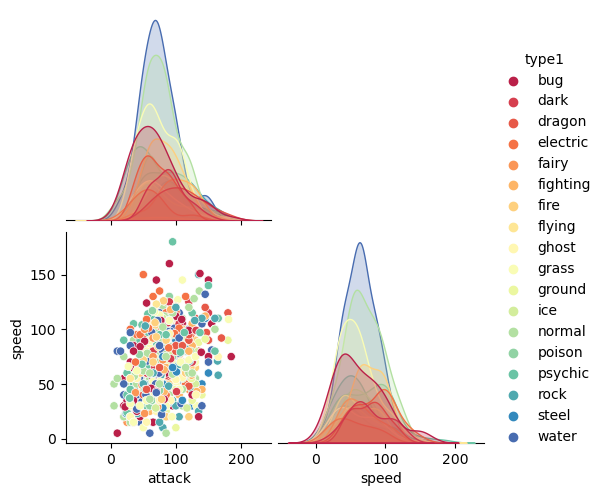

Ici j'affiche les varialbes attack et speed en fonction du type de pokemon.


In [12]:
sns.pairplot(df[['attack', 'speed', 'type1']], hue='type1', palette='Spectral', corner=True)
plt.show()
print('''Ici j'affiche les varialbes attack et speed en fonction du type de pokemon.''')

           attack   defense
attack   1.000000  0.468915
defense  0.468915  1.000000


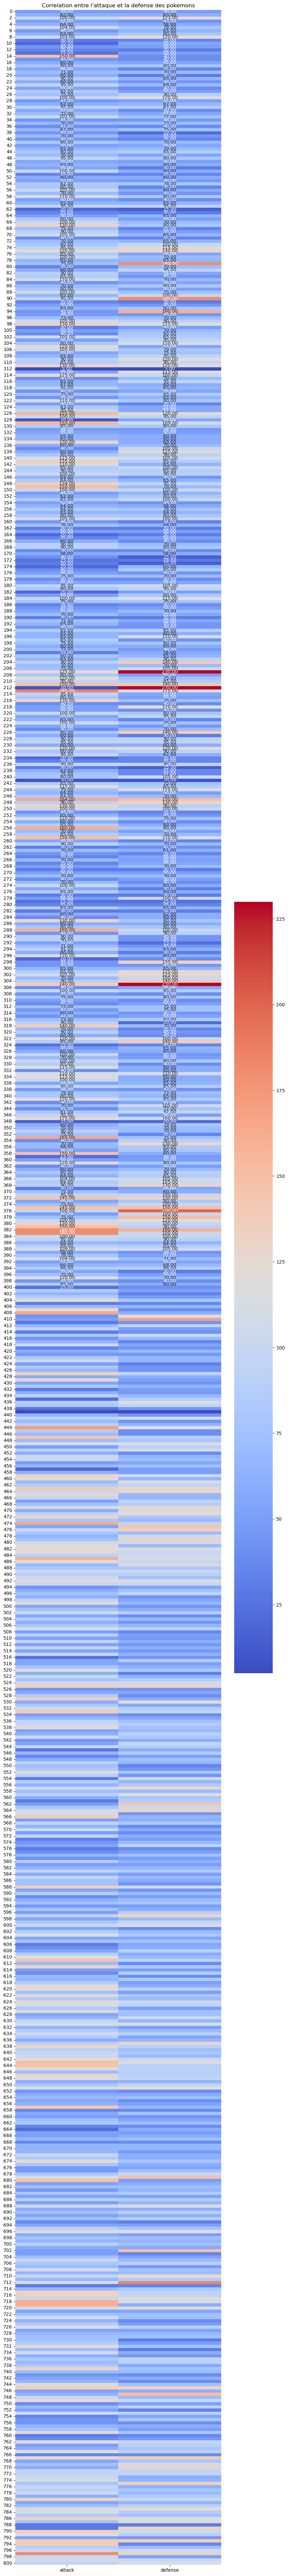

Dans un premier temps nous avons la correlation en chiffres entre l'attaque et la defense et il ne semble pas y en avoir beaucoup sinon la valeur serait proche de -1 ou 1. Et ensuite le graphique est le heatmap de la correlation


In [13]:
print(df[['attack', 'defense']].corr())
plt.figure(figsize=(10, 100))
sns.heatmap(df[['attack', 'defense']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation entre l'attaque et la defense des pokemons")
plt.show()
print('''Dans un premier temps nous avons la correlation en chiffres entre l'attaque et la defense et il ne semble pas y en avoir beaucoup sinon la valeur serait proche de -1 ou 1. Et ensuite le graphique est le heatmap de la correlation''')

In [14]:
df_numerique = df.select_dtypes(include=[np.number])
matrice_corr = df_numerique.corr()
np.fill_diagonal(matrice_corr.values, np.nan)
variable_max_corr = abs(matrice_corr).unstack().dropna().idxmax()
print('''Pour obtenir les varialbes les plus correlees il faut recuperer que les variables numeriques sans les mots ou sans les objets. Ensuite il faut remplir avec Not a Number les variables avec elles memes pour qu'elle ne soient pas les correlations sont parfaites entre elles memes.''')
print(f'''Les variables les plus correlees sont : {variable_max_corr[0]} et {variable_max_corr[1]}
Valeur : {matrice_corr.loc[variable_max_corr[0], variable_max_corr[1]]}''')

Pour obtenir les varialbes les plus correlees il faut recuperer que les variables numeriques sans les mots ou sans les objets. Ensuite il faut remplir avec Not a Number les variables avec elles memes pour qu'elle ne soient pas les correlations sont parfaites entre elles memes.
Les variables les plus correlees sont : base_egg_steps et is_legendary
Valeur : 0.8734883403994574


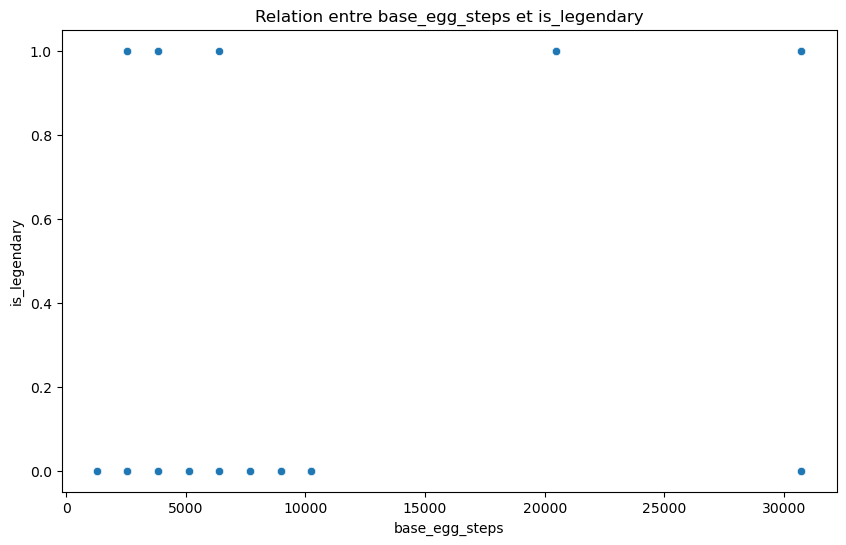

Voici visuellement la correlation avec un scatterplot.


In [15]:
x, y = variable_max_corr
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=x, y=y)
plt.title(f'Relation entre {x} et {y}')
plt.xlabel(x)
plt.ylabel(y)
plt.show()
print('''Voici visuellement la correlation avec un scatterplot.''')